In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load and Inspect the data

In [69]:
df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/train.csv", nrows=100000)
print("==========================")
print("First 5 values")
print(df.head())

print("==========================")
print("Describing the dataframe")
print(df.describe())

print("==========================")
print("Null values in each columns")
print(df.isnull().sum())

print("==========================")
print("Total gestures")
print(df['gesture'].value_counts())

First 5 values
              row_id sequence_type sequence_id  sequence_counter      subject  \
0  SEQ_000007_000000        Target  SEQ_000007                 0  SUBJ_059520   
1  SEQ_000007_000001        Target  SEQ_000007                 1  SUBJ_059520   
2  SEQ_000007_000002        Target  SEQ_000007                 2  SUBJ_059520   
3  SEQ_000007_000003        Target  SEQ_000007                 3  SUBJ_059520   
4  SEQ_000007_000004        Target  SEQ_000007                 4  SUBJ_059520   

                       orientation                                   behavior  \
0  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
1  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
2  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
3  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
4  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   

        pha

# Plot IMU sensor time series

In [70]:
# all rows related to the first sequence id
seq = df[df['sequence_id'] == df['sequence_id'].iloc[0]]

acc_cols = ['acc_x','acc_y','acc_z']
rot_cols = ['rot_w', 'rot_x','rot_y','rot_z']
thm_cols = ['thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']

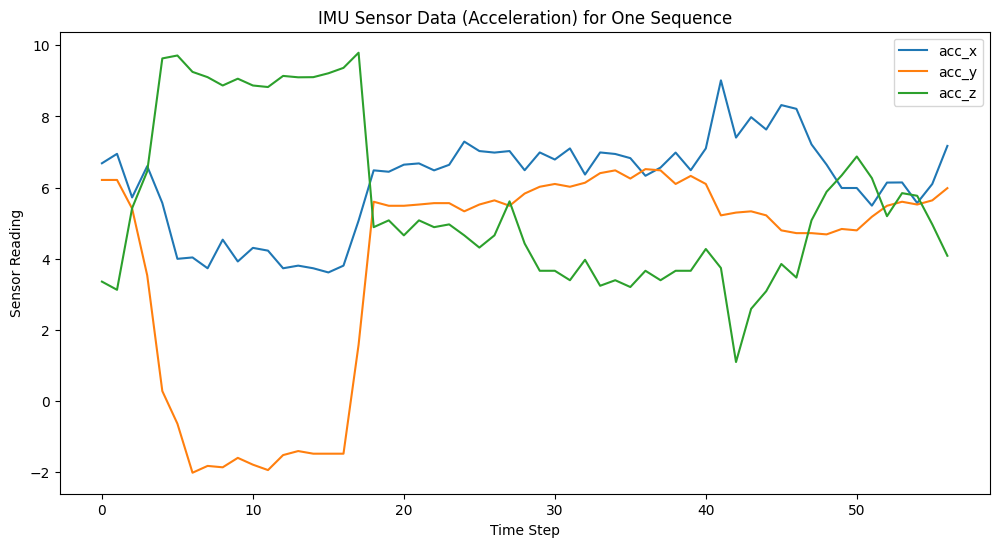

In [71]:
plt.figure(figsize=(12,6))
for axis in acc_cols :
    plt.plot(seq['sequence_counter'], seq[axis], label=axis)
plt.legend(); plt.title("IMU Sensor Data (Acceleration) for One Sequence")
plt.xlabel("Time Step"); plt.ylabel("Sensor Reading")
plt.show()

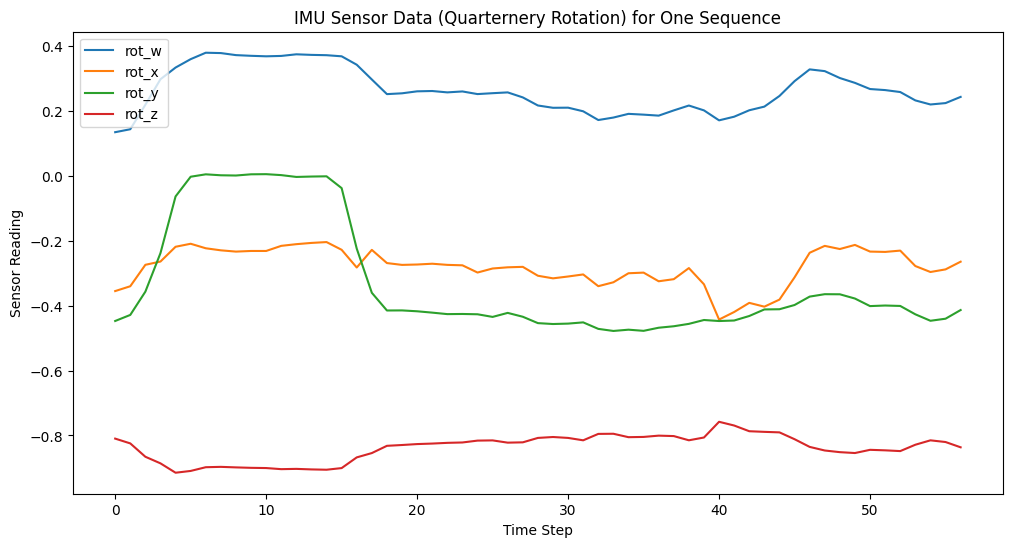

In [72]:
plt.figure(figsize=(12,6))
for axis in rot_cols :
    plt.plot(seq['sequence_counter'], seq[axis], label=axis)
plt.legend(); plt.title("IMU Sensor Data (Quarternery Rotation) for One Sequence")
plt.xlabel("Time Step"); plt.ylabel("Sensor Reading")
plt.show()

# Plot thermopile sensor data

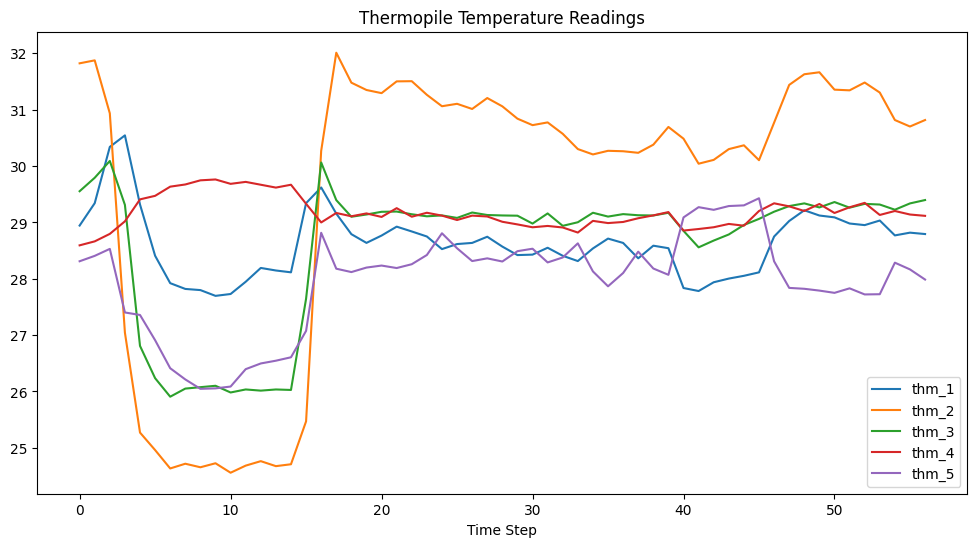

In [73]:
plt.figure(figsize=(12,6))
for i in range(1,6):
    plt.plot(seq['sequence_counter'], seq[f'thm_{i}'], label=f'thm_{i}')
plt.legend(); plt.title("Thermopile Temperature Readings"); plt.xlabel("Time Step")
plt.show()

# Visualize ToF frame

/tmp/ipykernel_35/411078599.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


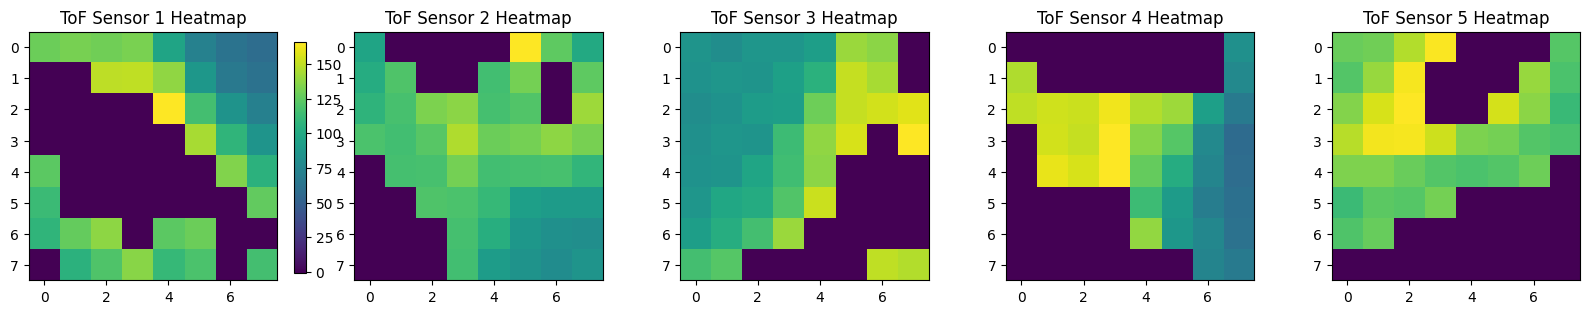

In [74]:
fig, axes = plt.subplots(1, 5, figsize=(16, 3))

for j in range(5):
    tof_cols = [f"tof_{j+1}_v{i}" for i in range(64)]
    frame = seq[tof_cols].iloc[0].values.reshape((8,8))
    im = axes[j].imshow(frame, cmap='viridis', interpolation='nearest')
    axes[j].set_title(f"ToF Sensor {j+1} Heatmap")

fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.92)
plt.tight_layout()
plt.show()

# Gesture comparison

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 1.0, 'Compare acc_x Signal')

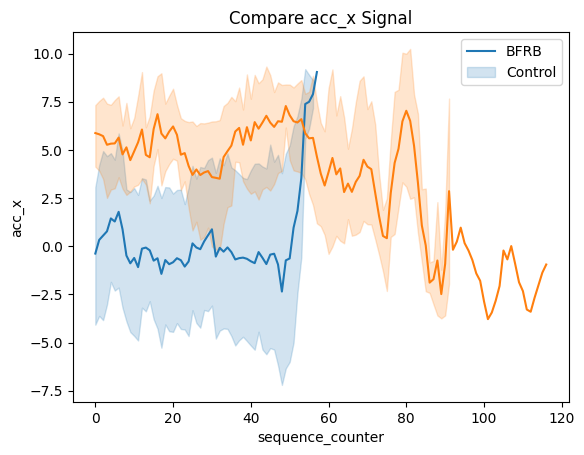

In [75]:
targets = df[df['gesture'].str.contains('Cheek - pinch skin')]
ctr = df[df['gesture']=='Drink from bottle/cup']
sns.lineplot(x='sequence_counter', y='acc_x', data=targets.iloc[:500])
sns.lineplot(x='sequence_counter', y='acc_x', data=ctr.iloc[:500])
plt.legend(["BFRB", "Control"]); plt.title("Compare acc_x Signal")

# Explore Distribution and Missingness

<Axes: >

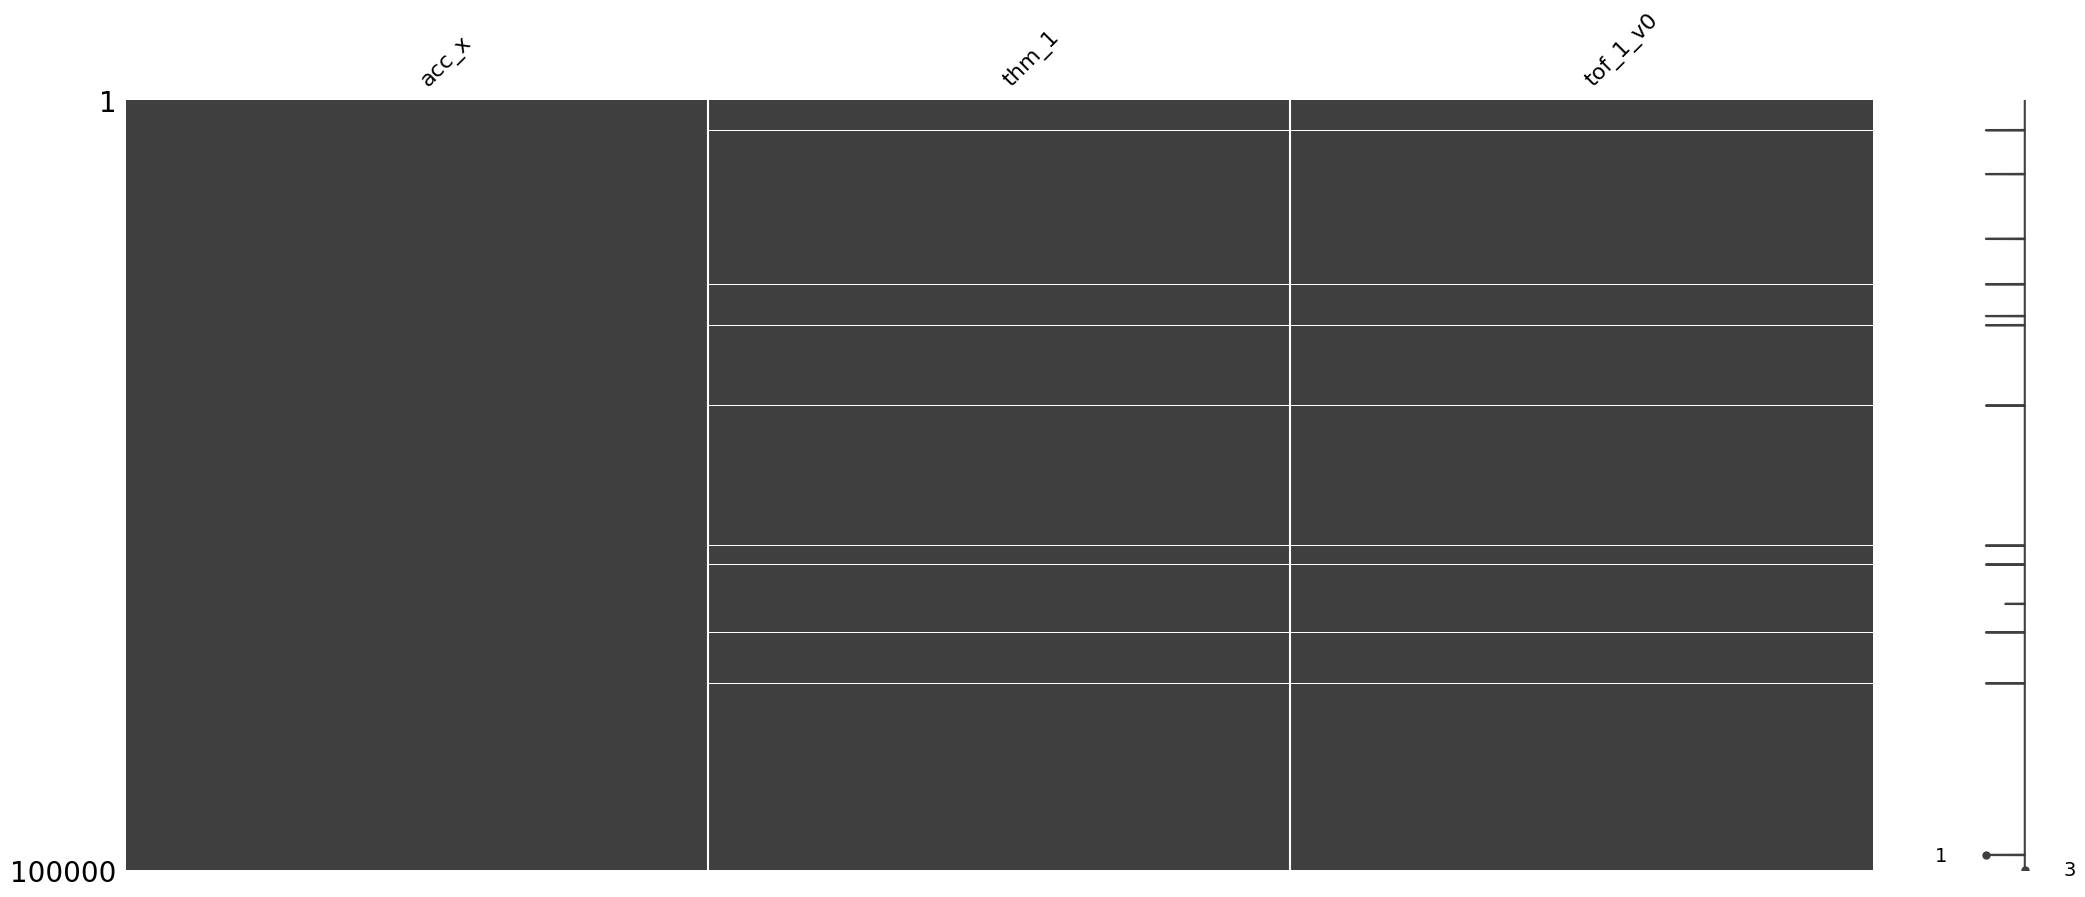

In [76]:
import missingno as msno

msno.matrix(df[['acc_x','thm_1','tof_1_v0']])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Thermopile 1 Distribution')

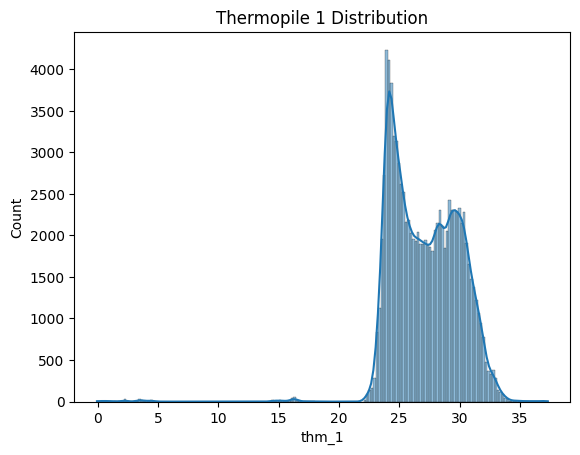

In [77]:
sns.histplot(df['thm_1'].dropna(), kde=True)
plt.title("Thermopile 1 Distribution")

# Categorical Values visualization

['row_id', 'sequence_type', 'sequence_id', 'subject', 'orientation', 'behavior', 'phase', 'gesture']


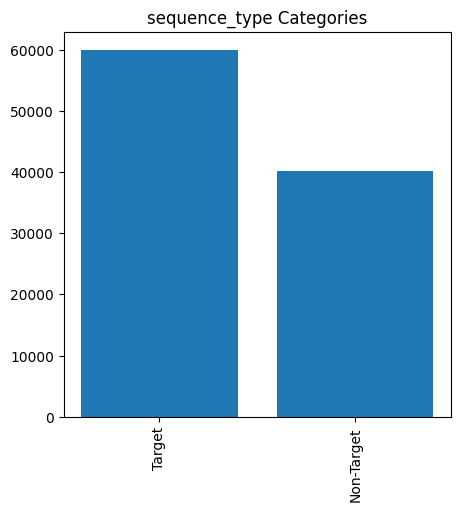

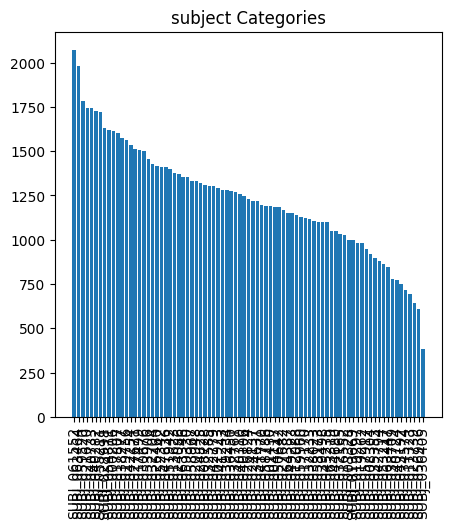

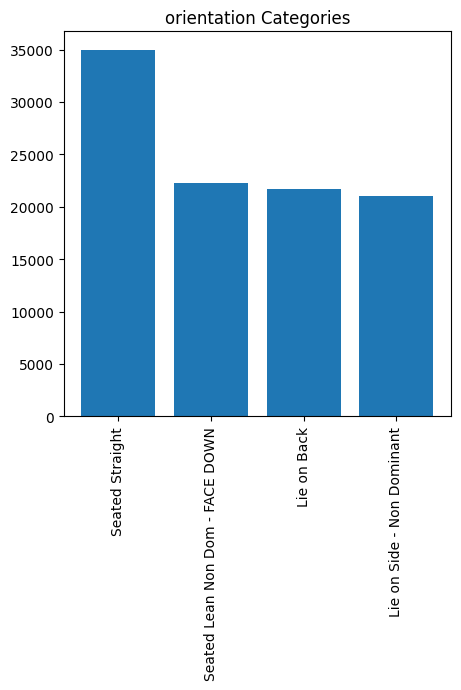

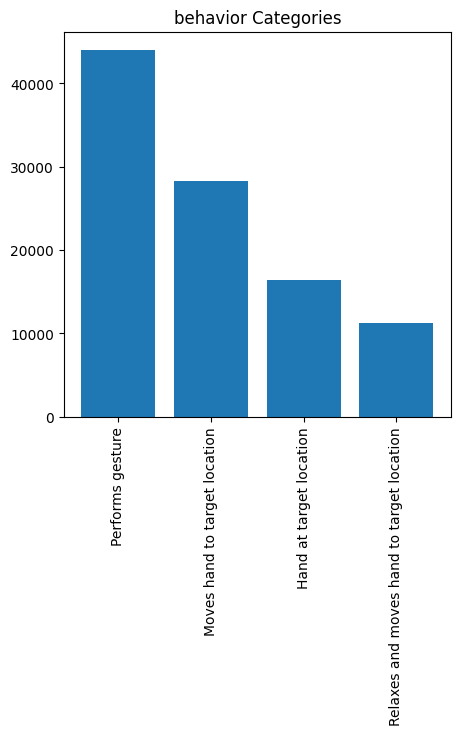

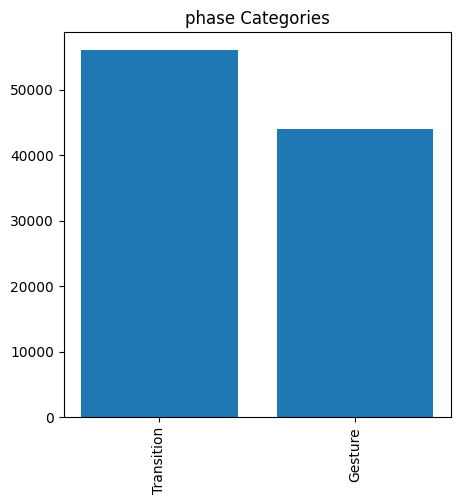

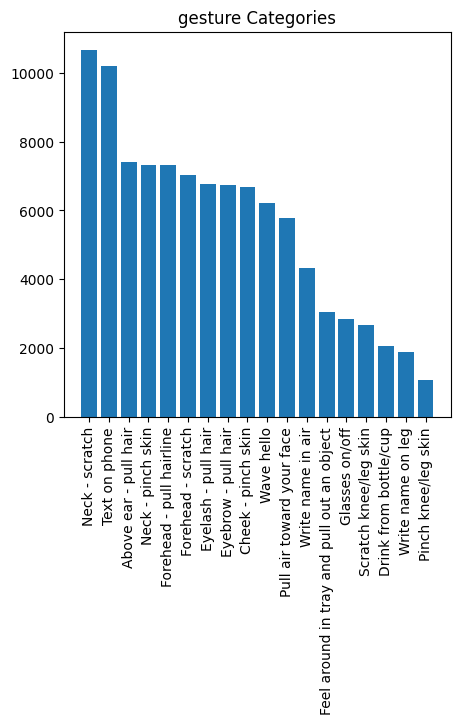

In [78]:
obj_cols = [col for col in df.columns if df[col].dtype == 'object']
print(obj_cols)

for col in obj_cols:
    if col in ['row_id', 'sequence_id']:
        continue
    # print(col, df[col].value_counts())
    # sns.catplot(data=df, x=col, kind='count')
    plt.figure(figsize=(5, 5))
    
    counts = df[col].value_counts()
    plt.bar(counts.index, counts.values)
    plt.xticks(rotation=90)
    plt.title(f"{col} Categories")
    plt.show()

# Missing Values Visualisation

In [79]:
null_series = df.isna().sum()
pos_null_series = null_series[null_series > 0]
print(pos_null_series)

rot_w         697
rot_x         697
rot_y         697
rot_z         697
thm_1         742
             ... 
tof_5_v59    4158
tof_5_v60    4158
tof_5_v61    4158
tof_5_v62    4158
tof_5_v63    4158
Length: 329, dtype: int64


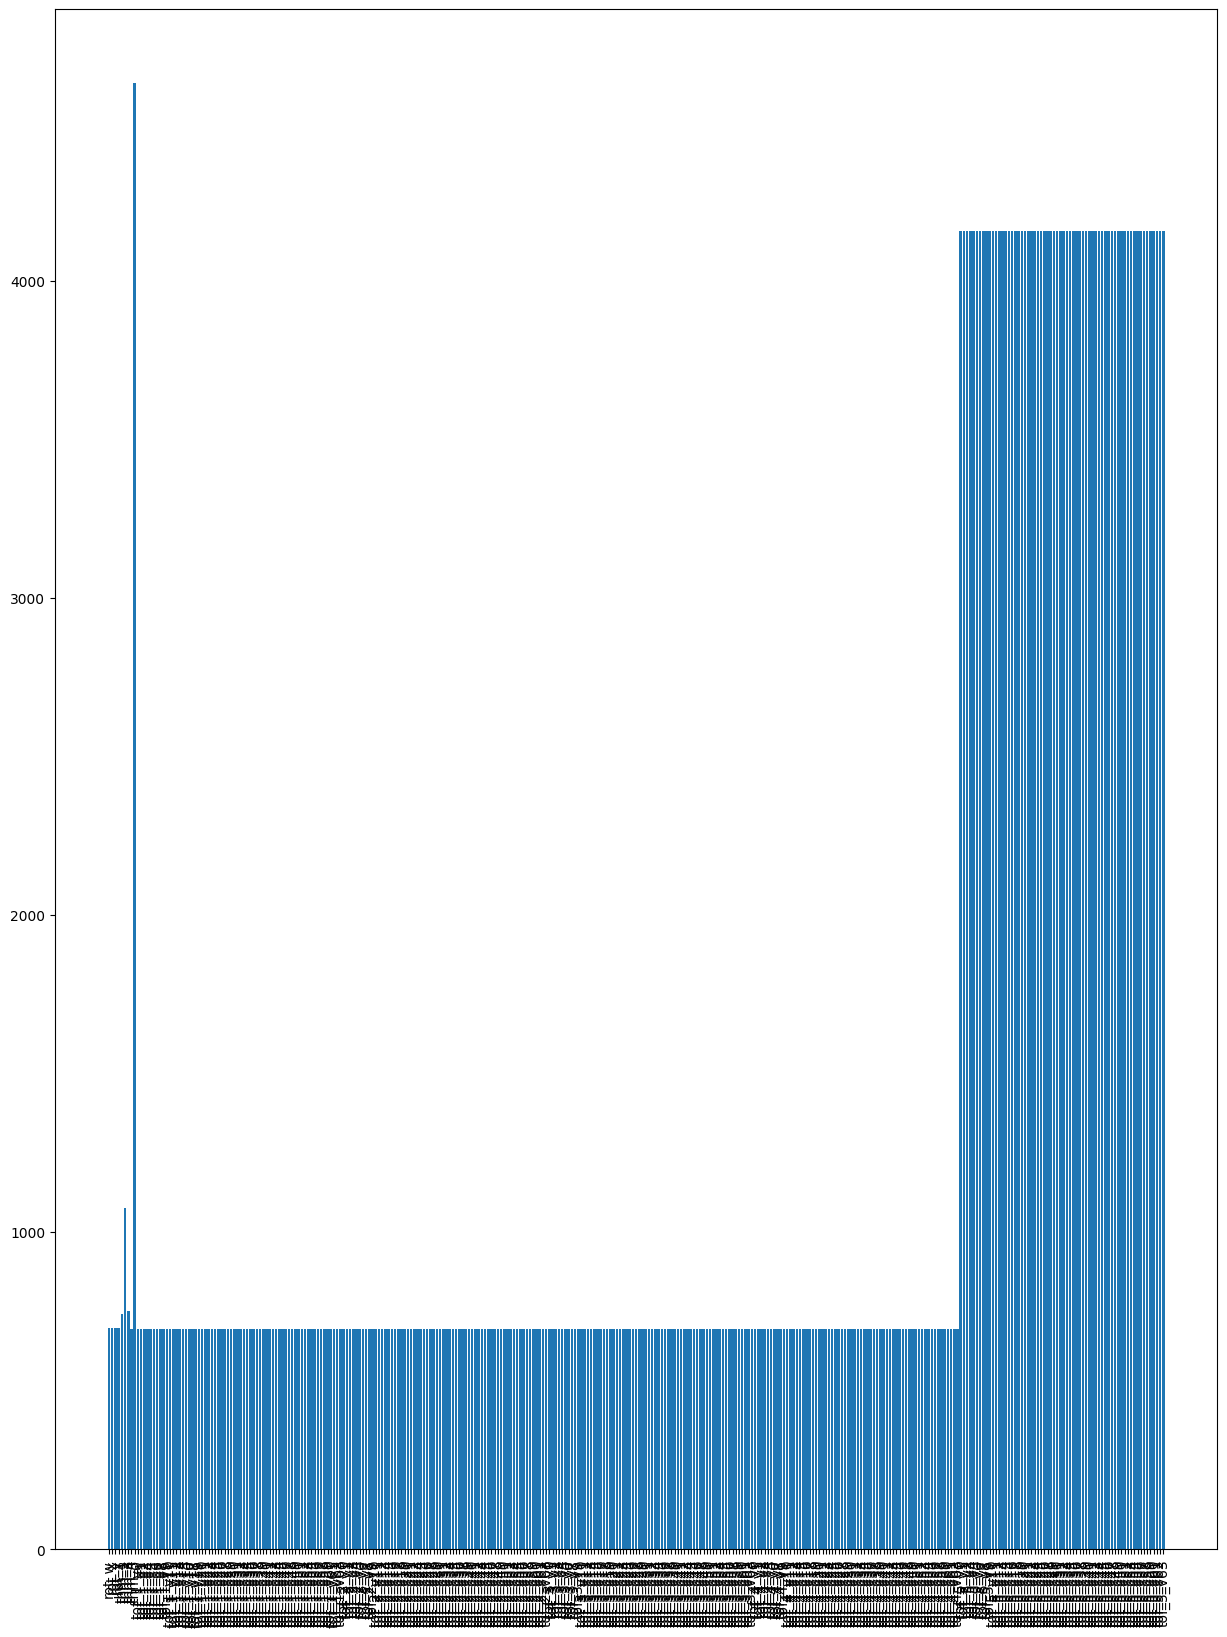

In [80]:
# sns.catplot(data=null_series[null_series > 0] , kind='count')
plt.figure(figsize=(15, 20))
plt.bar(null_series[null_series > 0].index, null_series[null_series > 0].values)
plt.xticks(rotation=90)
plt.show()

In [81]:
pos_null_series

rot_w         697
rot_x         697
rot_y         697
rot_z         697
thm_1         742
             ... 
tof_5_v59    4158
tof_5_v60    4158
tof_5_v61    4158
tof_5_v62    4158
tof_5_v63    4158
Length: 329, dtype: int64

In [82]:
l=pos_null_series.unique()

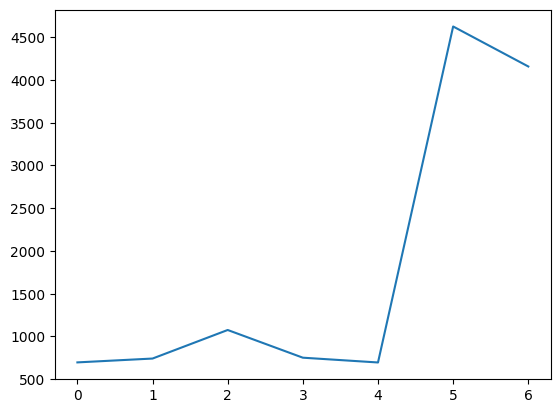

In [83]:
plt.plot(l)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 341 entries, row_id to tof_5_v63
dtypes: float64(332), int64(1), object(8)
memory usage: 260.2+ MB


# Outlier Detection

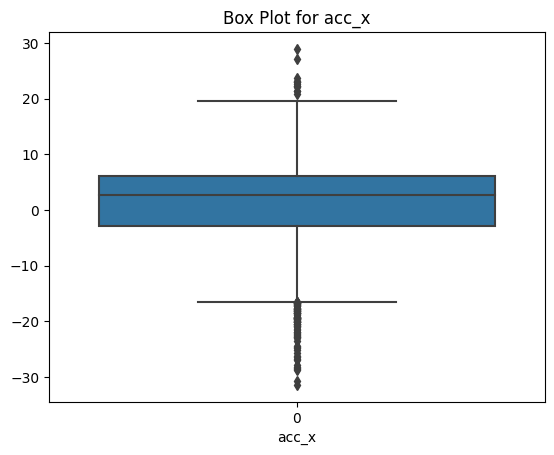

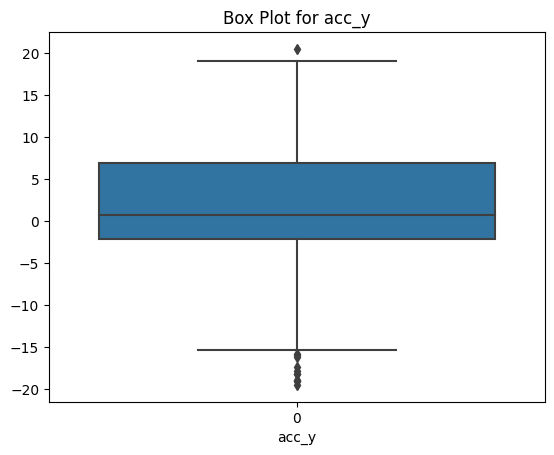

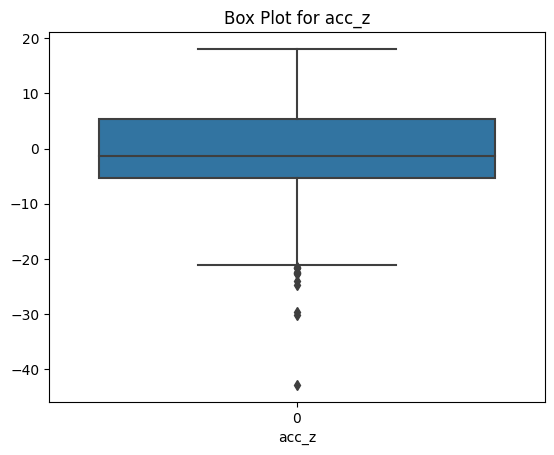

In [85]:
for col in acc_cols:
    sns.boxplot(df[col])
    plt.title(f"Box Plot for {col}")
    plt.xlabel(f"{col}")
    plt.show()

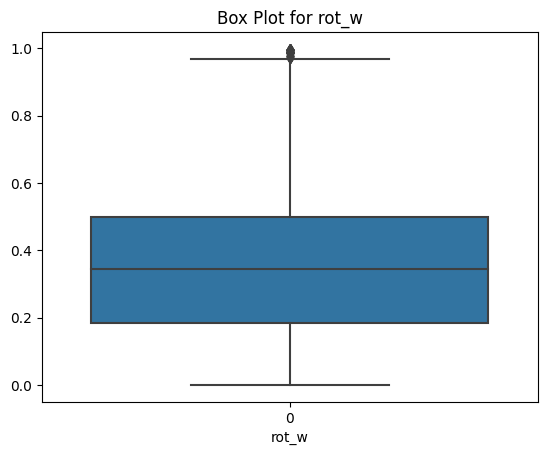

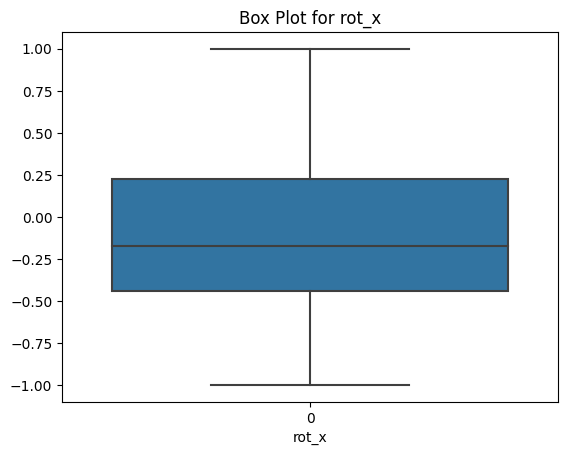

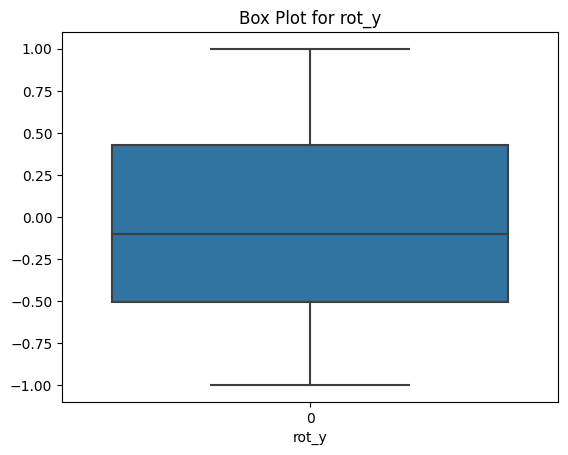

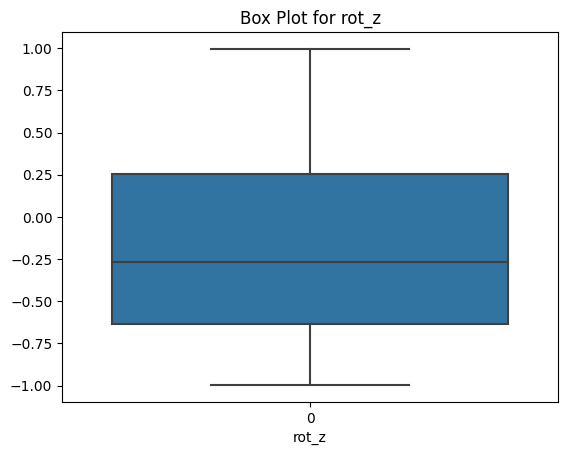

In [86]:
for col in rot_cols:
    sns.boxplot(df[col])
    plt.title(f"Box Plot for {col}")
    plt.xlabel(f"{col}")
    plt.show()

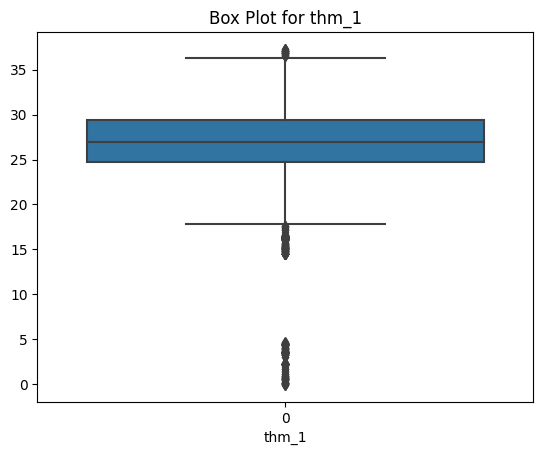

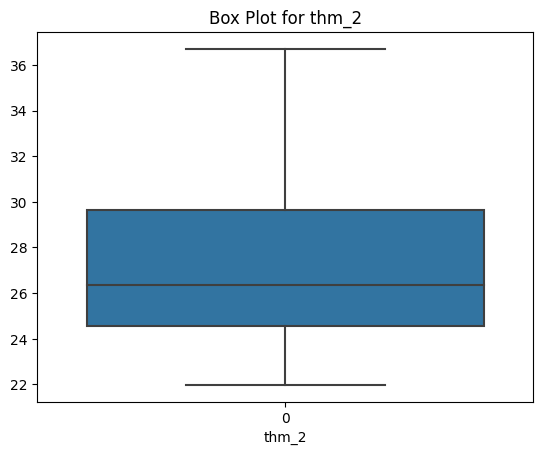

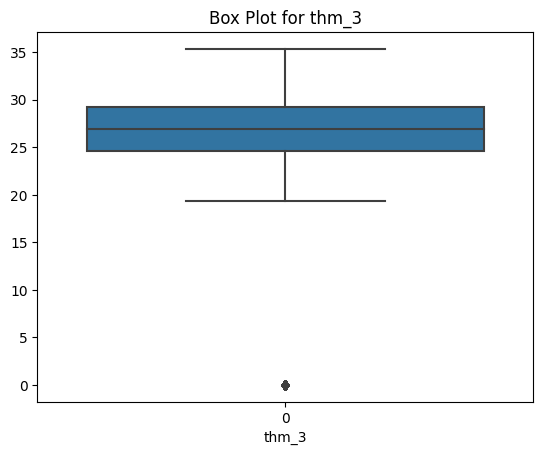

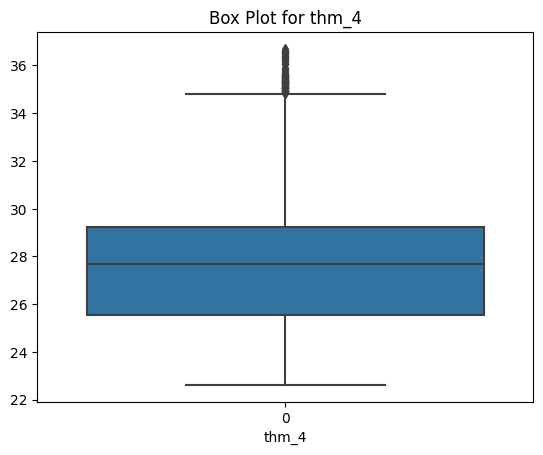

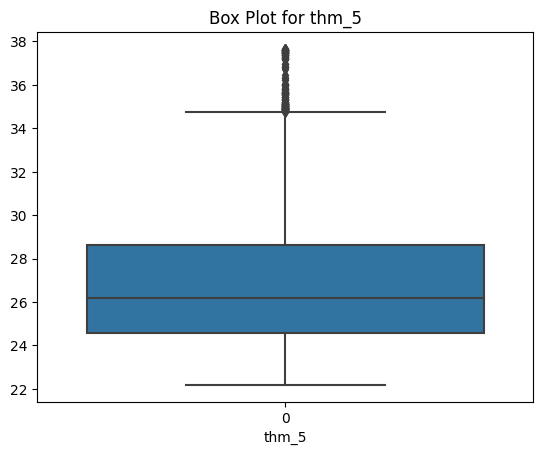

In [87]:
for col in thm_cols:
    sns.boxplot(df[col])
    plt.title(f"Box Plot for {col}")
    plt.xlabel(f"{col}")
    plt.show()

# Duplicate data

In [88]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [row_id, sequence_type, sequence_id, sequence_counter, subject, orientation, behavior, phase, gesture, acc_x, acc_y, acc_z, rot_w, rot_x, rot_y, rot_z, thm_1, thm_2, thm_3, thm_4, thm_5, tof_1_v0, tof_1_v1, tof_1_v2, tof_1_v3, tof_1_v4, tof_1_v5, tof_1_v6, tof_1_v7, tof_1_v8, tof_1_v9, tof_1_v10, tof_1_v11, tof_1_v12, tof_1_v13, tof_1_v14, tof_1_v15, tof_1_v16, tof_1_v17, tof_1_v18, tof_1_v19, tof_1_v20, tof_1_v21, tof_1_v22, tof_1_v23, tof_1_v24, tof_1_v25, tof_1_v26, tof_1_v27, tof_1_v28, tof_1_v29, tof_1_v30, tof_1_v31, tof_1_v32, tof_1_v33, tof_1_v34, tof_1_v35, tof_1_v36, tof_1_v37, tof_1_v38, tof_1_v39, tof_1_v40, tof_1_v41, tof_1_v42, tof_1_v43, tof_1_v44, tof_1_v45, tof_1_v46, tof_1_v47, tof_1_v48, tof_1_v49, tof_1_v50, tof_1_v51, tof_1_v52, tof_1_v53, tof_1_v54, tof_1_v55, tof_1_v56, tof_1_v57, tof_1_v58, tof_1_v59, tof_1_v60, tof_1_v61, tof_1_v62, tof_1_v63, tof_2_v0, tof_2_v1, tof_2_v2, tof_2_v3, tof_2_v4, tof_2_v5, tof_2_v6, tof_2_v7, tof_2_v8, tof_

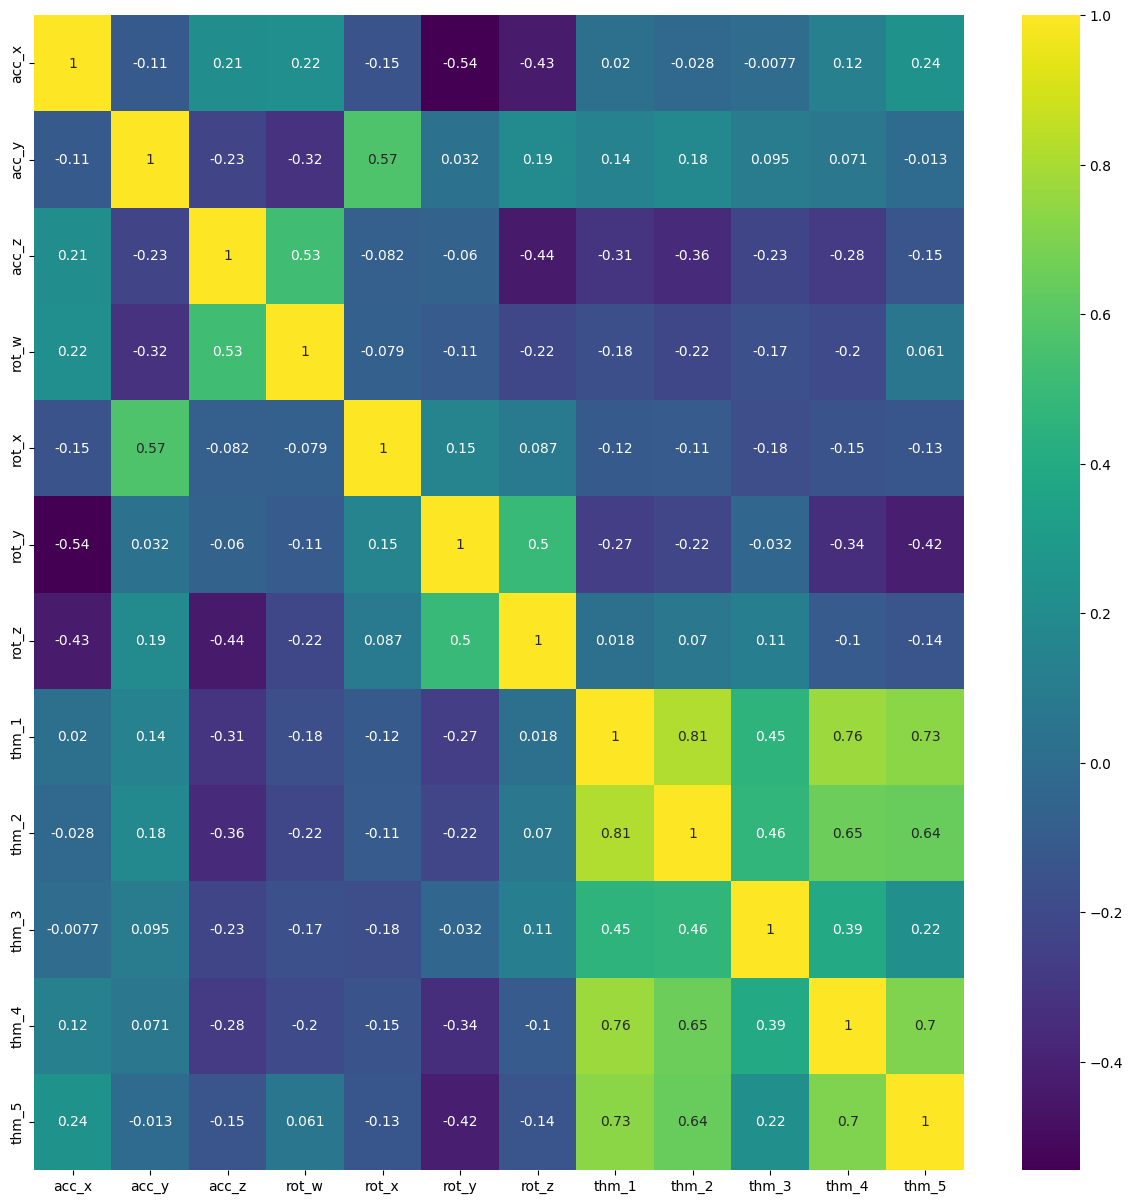

In [89]:
_cols = ['acc_x','acc_y','acc_z', 'rot_w', 'rot_x','rot_y','rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']

plt.figure(figsize=(15, 15))
corr = df[_cols].corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

Temperature data from sensors 1 2, 4 and 5 are correlated while from sensors 3 are not correlated.

# Fill Missing Values

In [90]:
df = df.fillna(method='ffill')

print(df.isna().sum())

/tmp/ipykernel_35/1004124505.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


row_id              0
sequence_type       0
sequence_id         0
sequence_counter    0
subject             0
                   ..
tof_5_v59           0
tof_5_v60           0
tof_5_v61           0
tof_5_v62           0
tof_5_v63           0
Length: 341, dtype: int64


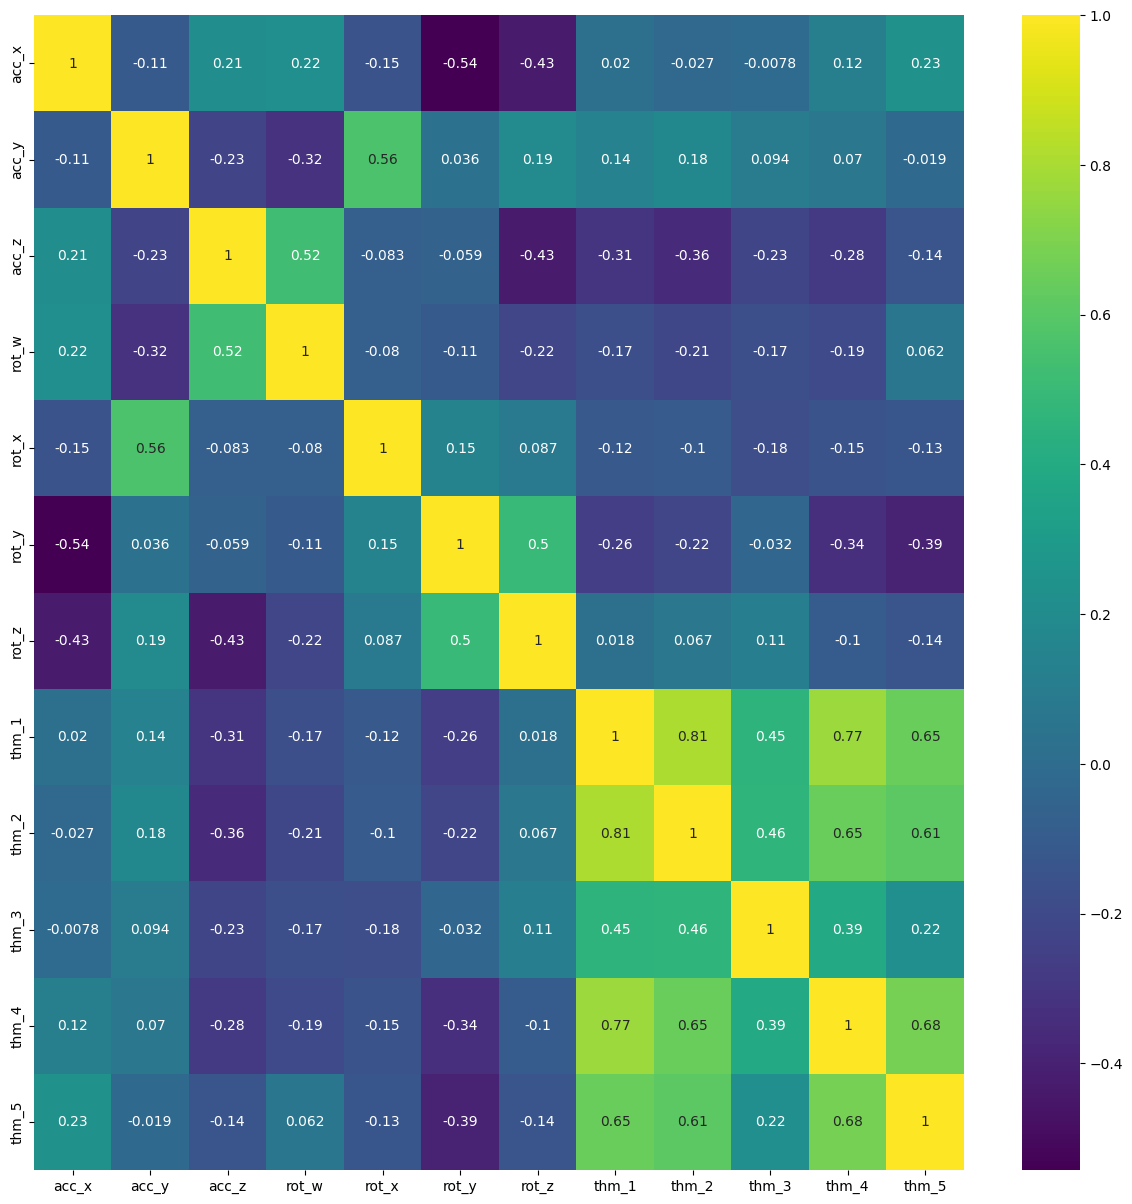

In [91]:
_cols = ['acc_x','acc_y','acc_z', 'rot_w', 'rot_x','rot_y','rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']

plt.figure(figsize=(15, 15))
corr = df[_cols].corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

# Data Augumentation

First we will try to fit the current model on the existing data. Then, we will try to find out the success of the model with respec to f1-scores.
And then we will try to find tune the model by augumenting the dataset.

In [96]:
df.drop('row_id', axis=1, inplace=True)

In [100]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()




obj_cols = [col for col in df.columns if df[col].dtype == 'object']
print(obj_cols)



for col in obj_cols:
    df[col] = encoder.fit_transform(df[col])

['sequence_type', 'sequence_id', 'subject', 'orientation', 'behavior', 'phase', 'gesture']


In [101]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 340 entries, sequence_type to tof_5_v63
dtypes: float64(332), int64(8)
memory usage: 259.4 MB
None


In [102]:
df['gesture']

0         1
1         1
2         1
3         1
4         1
         ..
99995    14
99996    14
99997    14
99998    14
99999    14
Name: gesture, Length: 100000, dtype: int64